This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources

[SKLearn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[SKLearn Train Test Split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[SKLearn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[SKLearn Scoring Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [735]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import accuracy_score
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from IPython.display import display, HTML

# Linear Regression

## Basics and Data Preparation

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Linear Regression:** `Your Answer Here`

**Polynomial Regression:** `Your Answer Here`

**Overfitting:** `Your Answer Here`

**Underfitting:** `Your Answer Here`

**Outlier:** `Your Answer Here`

**Categorical Encoding:** `Your Answer Here`

Use `auto_df` to complete the following.

In [2]:
columns = ['symboling','norm_loss','make','fuel','aspiration','doors',
           'bod_style','drv_wheels','eng_loc','wheel_base','length','width',
           'height','curb_weight','engine','cylinders','engine_size',
           'fuel_system','bore','stroke','compression','hp','peak_rpm',
           'city_mpg','hgwy_mpg','price']
auto_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
auto_df = pd.read_csv(auto_url, names=columns, header=None)

auto_df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Perform a train test split on `auto_df`, your target feature is `price`

In [3]:
train, test = train_test_split(auto_df, test_size=0.2)

In [4]:
target = 'price'
y_train = train[target]
y_test = test[target]

X_train = train[auto_df.columns.drop(["price"]).tolist()]
X_test = test[auto_df.columns.drop(["price"]).tolist()]

It's always good to practice EDA, so explore the dataset with both explanatory statistics and visualizations.

In [5]:
X_train.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
154,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,four,92,2bbl,3.05,3.03,9.0,62,4800,27,32
178,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,...,six,171,mpfi,3.27,3.35,9.3,161,5200,20,24
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20
134,3,150,saab,gas,std,two,hatchback,fwd,front,99.1,...,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28
180,-1,90,toyota,gas,std,four,sedan,rwd,front,104.5,...,six,171,mpfi,3.27,3.35,9.2,156,5200,20,24


In [6]:
X_train.tail()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32
81,3,153,mitsubishi,gas,std,two,hatchback,fwd,front,96.3,...,four,122,2bbl,3.35,3.46,8.5,88,5000,25,32
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,four,97,idi,3.01,3.40,23.0,68,4500,33,38
179,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,...,six,171,mpfi,3.27,3.35,9.3,161,5200,19,24
136,3,150,saab,gas,turbo,two,hatchback,fwd,front,99.1,...,four,121,mpfi,3.54,3.07,9.0,160,5500,19,26


In [7]:
X_train.describe(include="all")

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
count,164.000000,164,164,164,164,164,164,164,164,164.000000,...,164,164.000000,164,164,164,164.000000,164,164,164.000000,164.000000
unique,NaN,48,22,2,2,3,5,3,2,NaN,...,7,NaN,8,37,36,NaN,55,23,NaN,NaN
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,four,NaN,mpfi,3.62,3.40,NaN,68,4800,NaN,NaN
freq,NaN,35,24,146,133,92,78,97,161,NaN,...,129,NaN,76,19,17,NaN,15,27,NaN,NaN
mean,0.835366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.985976,...,NaN,128.554878,NaN,NaN,NaN,10.282378,NaN,NaN,25.121951,30.634146
std,1.264316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.995498,...,NaN,40.946209,NaN,NaN,NaN,4.208405,NaN,NaN,6.411053,6.804928
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,NaN,98.000000,NaN,NaN,NaN,8.500000,NaN,NaN,19.000000,25.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.200000,...,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.500000,30.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,NaN,145.250000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000


In [10]:
X_train.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors           object
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp              object
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
dtype: object

In [35]:
X_train["make"].value_counts()

toyota           24
nissan           13
mazda            13
volkswagen       12
mitsubishi       11
honda            10
peugot           10
subaru            9
bmw               8
volvo             8
mercedes-benz     7
saab              6
dodge             6
plymouth          5
audi              4
isuzu             4
porsche           4
jaguar            3
chevrolet         2
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64

In [36]:
X_train["fuel"].value_counts()

gas       146
diesel     18
Name: fuel, dtype: int64

In [37]:
X_train["aspiration"].value_counts()

std      133
turbo     31
Name: aspiration, dtype: int64

In [38]:
X_train["engine"].value_counts()

ohc      122
ohcf      12
l         11
ohcv       9
dohc       9
rotor      1
Name: engine, dtype: int64

In [39]:
X_train["cylinders"].value_counts()

four      129
six        20
five        9
eight       3
two         1
three       1
twelve      1
Name: cylinders, dtype: int64

/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


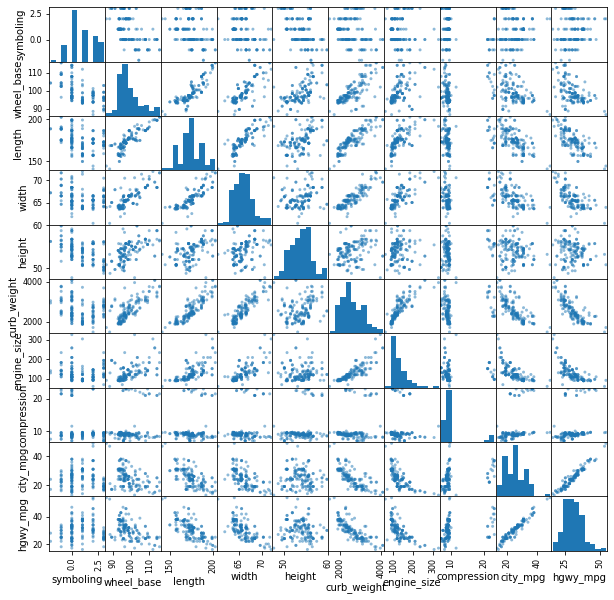

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.scatter_matrix(X_train, ax=ax)
plt.show()

Check for nulls and then write a function to fill in null values. As you can see with `norm_loss`, some of the nulls have a placeholder value of `?` that will need to be addressed.

In [12]:
X_train.isna().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
dtype: int64

In [15]:
X_train[X_train.columns[X_train.dtypes == "O"]]

,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,engine,cylinders,fuel_system,bore,stroke,hp,peak_rpm
154,81,toyota,gas,std,four,wagon,4wd,front,ohc,four,2bbl,3.05,3.03,62,4800
178,197,toyota,gas,std,two,hatchback,rwd,front,dohc,six,mpfi,3.27,3.35,161,5200
8,158,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,3.13,3.40,140,5500
134,150,saab,gas,std,two,hatchback,fwd,front,ohc,four,mpfi,2.54,2.07,110,5250
180,90,toyota,gas,std,four,sedan,rwd,front,dohc,six,mpfi,3.27,3.35,156,5200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,115,mazda,gas,std,four,sedan,fwd,front,ohc,four,2bbl,3.39,3.39,84,4800
81,153,mitsubishi,gas,std,two,hatchback,fwd,front,ohc,four,2bbl,3.35,3.46,88,5000
192,?,volkswagen,diesel,turbo,four,sedan,fwd,front,ohc,four,idi,3.01,3.40,68,4500
179,197,toyota,gas,std,two,hatchback,rwd,front,dohc,six,mpfi,3.27,3.35,161,5200


In [490]:
def cleaning(dataframe):
    
    df = dataframe.copy()
    df["doors"] = df["doors"].replace('?', "four")
    df = df.replace('?', np.NaN)
    df["norm_loss"] = df["norm_loss"].astype(float)
    df.at[82, 'norm_loss'] = df[(df["make"] == "mitsubishi") & (df["bod_style"] == "hatchback")]["norm_loss"].mean()
    df.at[83, 'norm_loss'] = df[(df["make"] == "mitsubishi") & (df["bod_style"] == "hatchback")]["norm_loss"].mean()
    df.at[5, 'norm_loss'] = df[(df["make"] == "audi") & (df["bod_style"] == "sedan")]["norm_loss"].mean()
    df.at[9, 'norm_loss'] = df[(df["make"] == "audi")]["norm_loss"].mean() 
    df.at[124, 'norm_loss'] = df[(df["make"] == "plymouth") & (df["bod_style"] == "hatchback")]["norm_loss"].mean()
    df.at[126, 'norm_loss'] = df[(df["make"] == "porsche")]["norm_loss"].mean() 
    df.at[127, 'norm_loss'] = df[(df["make"] == "porsche")]["norm_loss"].mean() 
    df.at[128, 'norm_loss'] = df[(df["make"] == "porsche")]["norm_loss"].mean() 
    df.at[0, 'norm_loss'] = df[(df["bod_style"] == "convertible")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[2, 'norm_loss'] = df[(df["bod_style"] == "hatchback")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[75, 'norm_loss'] = df[(df["bod_style"] == "hatchback")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[63, 'norm_loss'] = df[(df["make"] == "mazda")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[66, 'norm_loss'] = df[(df["make"] == "mazda")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[191, 'norm_loss'] = df[(df["make"] == "volkswagen") & (df["fuel"] == "gas")]["norm_loss"].mean()
    df.at[192, 'norm_loss'] = df[(df["make"] == "volkswagen") & (df["fuel"] == "diesel")]["norm_loss"].mean()
    df.at[193, 'norm_loss'] = df[(df["make"] == "volkswagen") & (df["fuel"] == "gas")]["norm_loss"].mean()
    df.at[189, 'norm_loss'] = df[(df["make"] == "volkswagen") & (df["fuel"] == "gas")]["norm_loss"].mean()
    df.at[130, 'norm_loss'] = df[(df["bod_style"] == "wagon")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[131, 'norm_loss'] = df[(df["bod_style"] == "hatchback")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[43, 'norm_loss'] = df[(df["bod_style"] == "sedan")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[46, 'norm_loss'] = df[(df["bod_style"] == "hatchback")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[44, 'norm_loss'] = df[(df["bod_style"] == "sedan")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[45, 'norm_loss'] = df[(df["bod_style"] == "sedan")]["norm_loss"].replace("?", np.NaN).astype(float).mean()
    df.at[14, 'norm_loss'] = df[(df["make"] == "bmw") & (df["cylinders"] == "six")]["norm_loss"].mean()
    df.at[15, 'norm_loss'] = df[(df["make"] == "bmw") & (df["cylinders"] == "six")]["norm_loss"].mean()
    df.at[16, 'norm_loss'] = df[(df["make"] == "bmw") & (df["cylinders"] == "six")]["norm_loss"].mean()
    df.at[17, 'norm_loss'] = df[(df["make"] == "bmw") & (df["cylinders"] == "six")]["norm_loss"].mean() 
    df.at[48, 'norm_loss'] = df[(df["make"] == "jaguar")]["norm_loss"].mean() 
    df.at[49, 'norm_loss'] = df[(df["make"] == "jaguar")]["norm_loss"].mean() 
    df.at[71, 'norm_loss'] = df[(df["make"] == "mercedes-benz") & (df["fuel"] == "gas")]["norm_loss"].mean() 
    df.at[74, 'norm_loss'] = df[(df["make"] == "mercedes-benz") & (df["fuel"] == "gas")]["norm_loss"].mean() 
    df.at[109, 'norm_loss'] = df[(df["bod_style"] == "wagon")]["norm_loss"].mean()
    df.at[110, 'norm_loss'] = df[(df["bod_style"] == "wagon")]["norm_loss"].mean()
    df.at[113, 'norm_loss'] = df[(df["bod_style"] == "wagon")]["norm_loss"].mean()
    df.at[114, 'norm_loss'] = df[(df["bod_style"] == "wagon")]["norm_loss"].mean()
    
    df["bore"] = df["bore"].astype(float)
    df.at[56, "bore"] = df[(df["make"] == "mazda")]["bore"].mean() 
    df["engine_size"] = df["engine_size"].astype(int)
    df["stroke"] = df["stroke"].astype(float)
    df.at[56, "stroke"] = df[(df["make"] == "mazda")]["stroke"].mean() 
    df["hp"] = df["hp"].astype(float)
    df.at[130, 'hp'] = df[(df["bod_style"] == "wagon")]["hp"].mean()
    df.at[131, 'hp'] = df[(df["bod_style"] == "hatchback")]["hp"].mean()
    df["peak_rpm"] = df["peak_rpm"].astype(float)
    df.at[130, 'peak_rpm'] = df[(df["bod_style"] == "wagon")]["peak_rpm"].mean()
    df.at[131, 'peak_rpm'] = df[(df["bod_style"] == "hatchback")]["peak_rpm"].mean()
    
    return df

In [491]:
cleaned_training_data = cleaning(X_train)

cleaned_training_data.isna().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
dtype: int64

How does train test split address underfitting/overfitting?

`Your Answer Here`

What are three synonyms for the Y Variable?
- `Dependent Variable`
- `Label`
- `Target`

What are three synonyms for the X Variable(s)?
- `Independent Variable`
- `Explanatory Variable`
- `Feature`

One hot encode a categorical feature

In [675]:
encoder = OneHotEncoder(use_cat_names=True)

X_train_encoded = encoder.fit_transform(cleaned_training_data)

cleaned_training_data.shape, X_train_encoded.shape

((164, 25), (164, 74))

In [493]:
X_train_encoded.head()

,symboling,norm_loss,make_toyota,make_audi,make_saab,make_nissan,make_peugot,make_volvo,make_dodge,make_mercedes-benz,...,fuel_system_4bbl,fuel_system_mfi,fuel_system_spfi,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
154,0,81.0,1,0,0,0,0,0,0,0,...,0,0,0,3.05,3.03,9.0,62.0,4800.0,27,32
178,3,197.0,1,0,0,0,0,0,0,0,...,0,0,0,3.27,3.35,9.3,161.0,5200.0,20,24
8,1,158.0,0,1,0,0,0,0,0,0,...,0,0,0,3.13,3.40,8.3,140.0,5500.0,17,20
134,3,150.0,0,0,1,0,0,0,0,0,...,0,0,0,2.54,2.07,9.3,110.0,5250.0,21,28
180,-1,90.0,1,0,0,0,0,0,0,0,...,0,0,0,3.27,3.35,9.2,156.0,5200.0,20,24


Define the 5 versions of **Baseline**:
1. `The score you'd get by guessing`
2. `Fast, first models that beat guessing`
3. `Complete, tuned "simpler" model (Simpler mathematically, computationally. Or less work for you, the data scientist.)`
4. `Minimum performance that "matters" to go to production and benefit your employer and the people you serve.`
5. `Minimum performance that "matters" to go to production and benefit your employer and the people you serve.`
`

What is the purpose of getting a baseline that tells you what you would get with a guess? (Mean or Majority Classifier Baseline)

`Machine learning may not be an appropriate business solution if the model is incapable of beating a "guess" baseline`

In [545]:
y_train.dtypes

dtype('O')

In [548]:
y_train.value_counts()

?        3
8845     2
7775     2
7295     2
7609     2
        ..
13495    1
9989     1
30760    1
34028    1
7975     1
Name: price, Length: 153, dtype: int64

In [568]:
y_train_filled = y_train.replace("?", np.NaN).astype(float).fillna(y_train.replace("?", np.NaN).astype(float).mean())

In [569]:
guess = y_train_filled.mean()


Get the mean baseline for the target feature. If you log transformed the target feature, get the mean baseline of the log transformed target feature.

In [570]:
y_pred = [guess] * len(y_train_filled)

In [571]:
mse = mean_squared_error(y_train_filled, y_pred)
rmse = np.sqrt(mse)
print(f'Train Root Mean Square Error: ${rmse:.2f}')
mae = mean_absolute_error(y_train_filled, y_pred)
print(f'Train Mean Absolute Error: ${mae:.2f}')
r2 = r2_score(y_train_filled, y_pred)
print(f'Train R^2 Score: {r2:.2f}\n')



Train Root Mean Square Error: $8155.37
Train Mean Absolute Error: $6064.80
Train R^2 Score: 0.00



In [572]:
y_test_filled = y_test.replace("?", np.NaN).astype(float).fillna(y_test.replace("?", np.NaN).astype(float).mean())
y_pred = [guess] * len(y_test_filled)
mse = mean_squared_error(y_test_filled, y_pred)
rmse = np.sqrt(mse)
print(f'Test Root Mean Square Error: ${rmse:.2f}')
mae = mean_absolute_error(y_test_filled, y_pred)
print(f'Test Mean Absolute Error: ${mae:.2f}')
r2 = r2_score(y_test_filled, y_pred)
print(f'Test R^2 Score: {r2:.2f}')

Test Root Mean Square Error: $6550.70
Test Mean Absolute Error: $4980.38
Test R^2 Score: -0.10


## Modeling

What is the 5 step process for using the Scikit-learn's estimator API?
1. `Choose a class of model by importing the appropriate estimator class from Scikit-Learn.`
2. `Choose model hyperparameters by instantiating this class with desired values.`
3. `Arrange data into a features matrix and target vector following the discussion above.`
4. `Fit the model to your data by calling the fit() method of the model instance.`
5. `Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the predict() method.`

Follow the 5 steps to make a prediction on your test set. The functions and changes you made to `X_train` may need to be applied to `X_test` if you have not done so already.

In [578]:
X_test[X_test.columns[X_test.dtypes == "O"]]

,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,engine,cylinders,fuel_system,bore,stroke,hp,peak_rpm
195,74,volvo,gas,std,four,wagon,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400
167,134,toyota,gas,std,two,hardtop,rwd,front,ohc,four,mpfi,3.62,3.50,116,4800
84,?,mitsubishi,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi,3.59,3.86,145,5000
163,168,toyota,gas,std,two,sedan,rwd,front,ohc,four,2bbl,3.19,3.03,70,4800
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500
129,?,porsche,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi,3.94,3.11,288,5750
7,?,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi,3.19,3.40,110,5500
73,?,mercedes-benz,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi,3.80,3.35,184,4500
57,150,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl,?,?,101,6000
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500


In [707]:
def clean_test_data(dataframe):
    df = dataframe.copy()
    df = df.replace("?", np.NaN)
    df["norm_loss"] = df["norm_loss"].astype(float)
    df.at[84, 'norm_loss'] = df[(df["make"] == "mitsubishi")]["norm_loss"].mean()
    df.at[129, 'norm_loss'] = df[df["bod_style"] == "hatchback"]["norm_loss"].mean()
    df.at[7, 'norm_loss'] = df[(df["make"] == "audi")]["norm_loss"].mean()
    df.at[181, 'norm_loss'] = df[(df["make"] == "toyota") & (df["bod_style"] == "wagon")]["norm_loss"].mean()
    df.at[1, 'norm_loss'] = df[df["doors"] == "two"]["norm_loss"].mean()
    df.at[73, 'norm_loss'] = df[df["bod_style"] == "sedan"]["norm_loss"].mean()
    df["doors"] = df["doors"].fillna(method="ffill")
    
    
    
    df["bore"] = df["bore"].astype(float)
    df.at[57, "bore"] = df[(df["make"] == "mazda")]["bore"].mean()
    df.at[58, "bore"] = df[(df["make"] == "mazda")]["bore"].mean()
    df.at[55, "bore"] = df[(df["make"] == "mazda")]["bore"].mean()
    
    
    df["stroke"] = df["stroke"].astype(float)
    df.at[57, "stroke"] = df[(df["make"] == "mazda")]["stroke"].mean()
    df.at[58, "stroke"] = df[(df["make"] == "mazda")]["stroke"].mean()
    df.at[55, "stroke"] = df[(df["make"] == "mazda")]["stroke"].mean()
    
    df["hp"] = df["hp"].astype(int)
    
    df["peak_rpm"] = df["peak_rpm"].astype(int)
    
    return df

In [708]:
cleaned_testing_data = clean_test_data(X_test)

cleaned_testing_data.isna().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
dtype: int64

In [709]:
cleaned_testing_data

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
195,-1,74.000000,volvo,gas,std,four,wagon,rwd,front,104.3,...,four,141,mpfi,3.78,3.15,9.50,114,5400,23,28
167,2,134.000000,toyota,gas,std,two,hardtop,rwd,front,98.4,...,four,146,mpfi,3.62,3.50,9.30,116,4800,24,30
84,3,125.000000,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,four,156,spdi,3.59,3.86,7.00,145,5000,19,24
163,1,168.000000,toyota,gas,std,two,sedan,rwd,front,94.5,...,four,98,2bbl,3.19,3.03,9.00,70,4800,29,34
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30
129,1,133.857143,porsche,gas,std,two,hatchback,rwd,front,98.4,...,eight,203,mpfi,3.94,3.11,10.00,288,5750,17,28
7,1,161.000000,audi,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25
73,0,127.235294,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,eight,308,mpfi,3.80,3.35,8.00,184,4500,14,16
57,3,150.000000,mazda,gas,std,two,hatchback,rwd,front,95.3,...,two,70,4bbl,3.08,3.15,9.40,101,6000,17,23
202,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.80,134,5500,18,23


In [710]:
X_test_encoded = encoder.transform(cleaned_testing_data)

cleaned_testing_data.shape, X_test_encoded.shape

((41, 25), (41, 74))

In [711]:
X_test_encoded.head()

,symboling,norm_loss,make_toyota,make_audi,make_saab,make_nissan,make_peugot,make_volvo,make_dodge,make_mercedes-benz,...,fuel_system_4bbl,fuel_system_mfi,fuel_system_spfi,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg
195,-1,74.0,0,0,0,0,0,1,0,0,...,0,0,0,3.78,3.15,9.5,114,5400,23,28
167,2,134.0,1,0,0,0,0,0,0,0,...,0,0,0,3.62,3.50,9.3,116,4800,24,30
84,3,125.0,0,0,0,0,0,0,0,0,...,0,0,0,3.59,3.86,7.0,145,5000,19,24
163,1,168.0,1,0,0,0,0,0,0,0,...,0,0,0,3.19,3.03,9.0,70,4800,29,34
3,2,164.0,0,1,0,0,0,0,0,0,...,0,0,0,3.19,3.40,10.0,102,5500,24,30


In [440]:
# Step 1 - Use Linear Regression
model = LinearRegression()

In [712]:
# Step 2
model.fit(X_train_encoded, y_train_filled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [713]:
# Step 3
y_pred = model.predict(X_test_encoded)

In [714]:
# Step 4
y_pred

array([16495.13567231, 11820.71354875, 14634.29137906,  7337.97669783,
       11533.97512806, 39053.30408548, 19611.37955569, 43497.91937261,
       12950.05656272, 17477.87596664, 17496.81430489,  6377.51765023,
       10123.48759282, 17422.68327366, 14586.08159688,  7192.45630256,
        7452.86104349, 14398.8611928 ,  5480.86601164,  9372.94878654,
        9331.95086957,  5486.89279362, 12929.21592475, 10214.94230158,
        6961.43582715,  6616.03750022,  8073.71381561,  8691.22059853,
       13703.14893671, 11327.7074217 , 15763.86056734, 12905.75753078,
       17535.82860501,  5512.17218175,  5945.36906763, 15127.19318818,
       18338.07501303,  6104.28955507,  9854.68352339,  7777.32142585,
        5774.87402075])

## Scoring

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Mean Absolute Error (MAE):** `Your Answer Here`

**Mean Squared Error (MSE):** `Your Answer Here`

**Root Mean Squared Error (RMSE):** `Your Answer Here`

**Coefficient of Determination ($R^2$):** `Your Answer Here`

**Residual Error:** `Your Answer Here`

**Bias:** `Your Answer Here`

**Variance:** `Your Answer Here`

**Validation Curve:** `Your Answer Here`

**Ordinary Least Squares:** `Your Answer Here`

**Ridge Regression:** `Your Answer Here`

In a short paragraph, explain the Bias-Variance Tradeoff

```
Your Answer Here
```

Use each of the regression metrics (MAE, MSE, RMSE, and $R^2$) on both the mean baseline and your predictions.

In [715]:
# MAE
mae = mean_absolute_error(y_test_filled, y_pred)
print(f'Test Mean Absolute Error: ${mae:.2f}')

Test Mean Absolute Error: $2026.03


In [716]:
# MSE
mse = mean_squared_error(y_test_filled, y_pred)
print(f'Test Mean Squared Error: ${mse:.2f}')

Test Mean Absolute Error: $21699948.75


In [717]:
# RMSE
rmse = np.sqrt(mse)
print(f'Test Root Mean Square Error: ${rmse:.2f}')

Test Root Mean Square Error: $4658.32


In [718]:
# R^2
r2 = r2_score(y_test_filled, y_pred)
print(f'Test R^2 Score: {r2:.2f}')

Test R^2 Score: 0.44


Print and plot the coefficients of your model.

In [719]:
# Print the coefficients

model.coef_

array([-9.81204935e+01,  6.14685269e+00, -5.44206326e+02,  5.74852166e+02,
        3.39098224e+03, -7.33287419e+02, -4.35402107e+03,  3.13130854e+02,
       -3.56576854e+03,  2.55303182e+03, -4.87612203e+02, -1.33782253e+03,
        7.98146928e+03, -1.85629818e+03,  2.01830063e+03, -4.16637745e+03,
       -3.32171685e+03,  1.50669767e+03, -1.88535235e+03,  1.42233852e+02,
       -7.70854198e+02,  3.50408610e+03,  4.81167723e+03, -3.77314470e+03,
       -1.77235959e+03,  1.77235959e+03, -1.02438247e+03,  1.02438247e+03,
       -6.68451419e+01,  6.68451419e+01,  3.93358940e+02, -1.39412184e+03,
        1.13073658e+02, -1.88525886e+02,  1.07621513e+03, -2.65174446e+02,
       -7.32315143e+01,  3.38405960e+02, -4.21134237e+03,  4.21134237e+03,
        2.73230096e+02, -2.01064982e+02,  7.35723532e+02, -2.71944104e+02,
        8.85980639e+00,  2.07053535e+02, -9.11623694e+02, -4.10092656e+03,
        6.44246390e+02,  2.35504418e+03,  1.80620614e+03, -5.88657919e+02,
       -2.22004321e+03, -

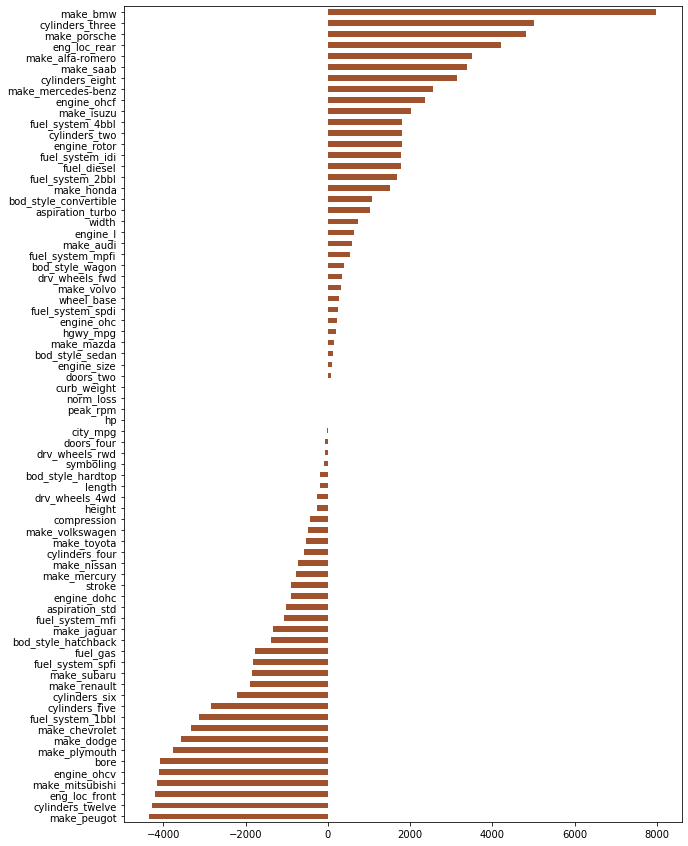

In [724]:
# Plot the coefficients
import matplotlib.pyplot as plt
%matplotlib inline

coefficients = pd.Series(model.coef_, X_train_encoded.columns)
fig, ax = plt.subplots(figsize=(10,15))
coefficients.sort_values().plot.barh(color="#A0522D", ax=ax);
plt.show()

Interpret your results with a short paragraph. How well did your model perform? How do you read a single prediction? Did you beat the baseline? 

```
Your Answer Here
```

Use Ridge Regression and get the $R^2$ score

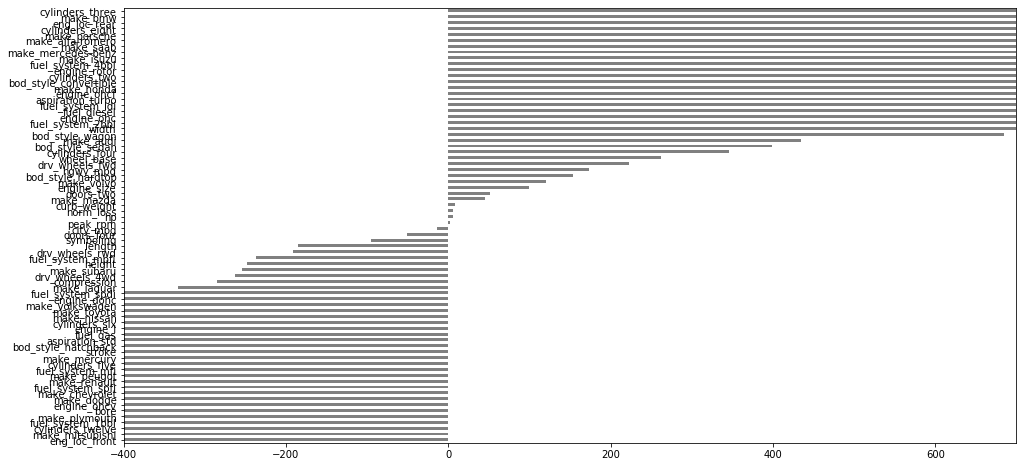

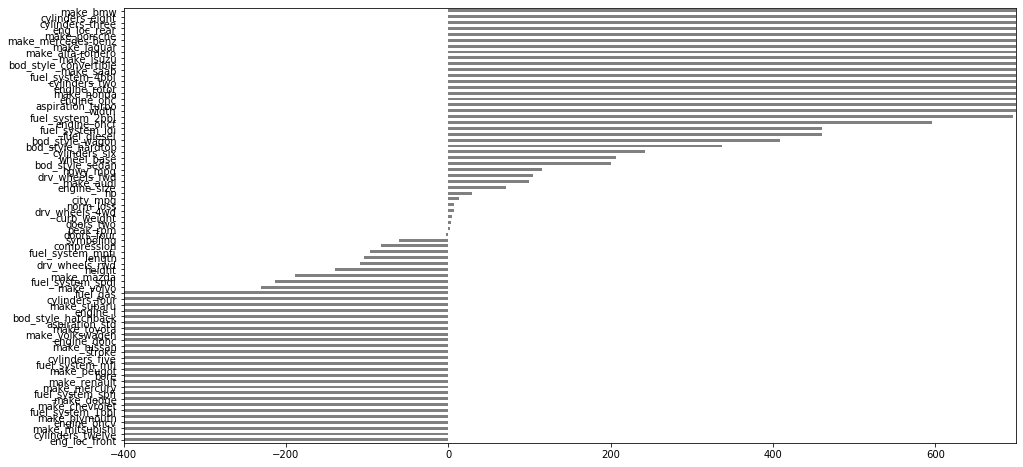

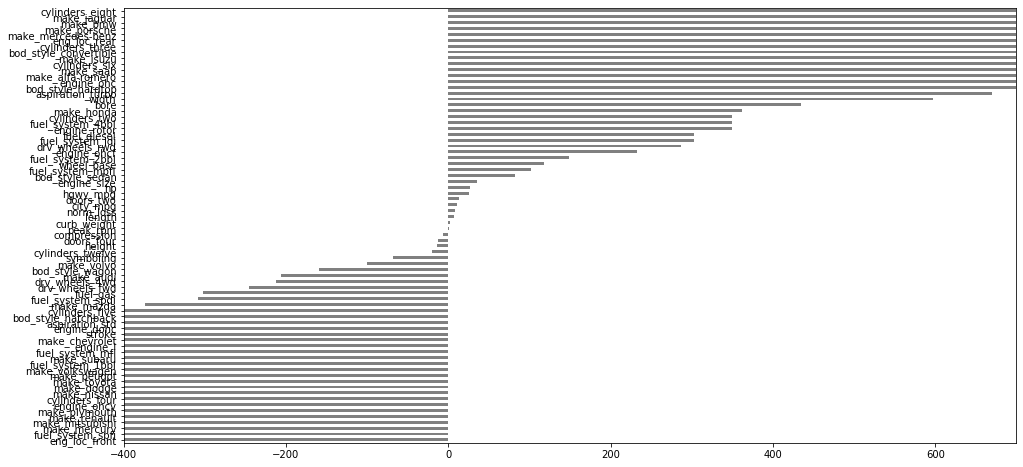

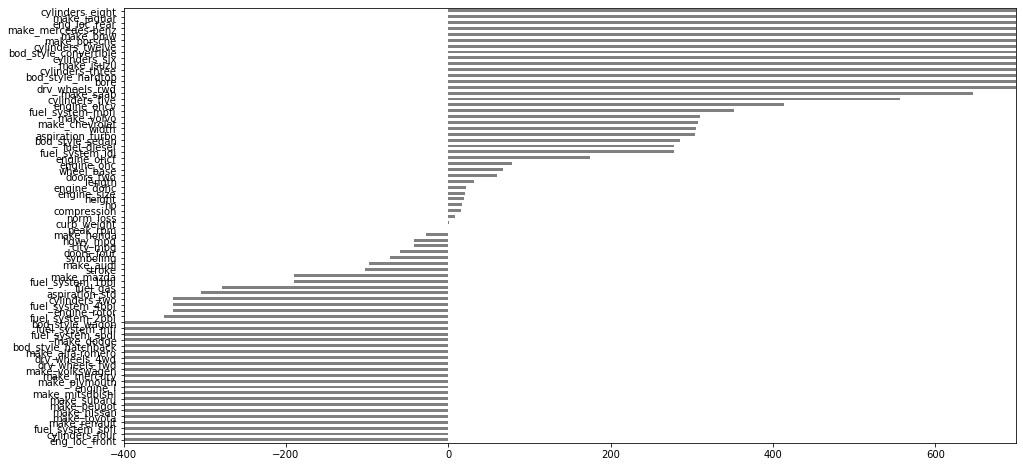

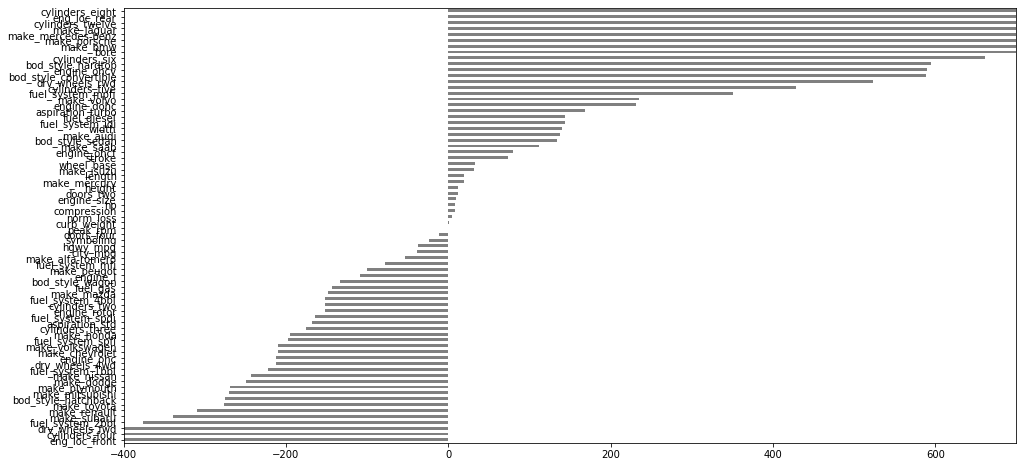

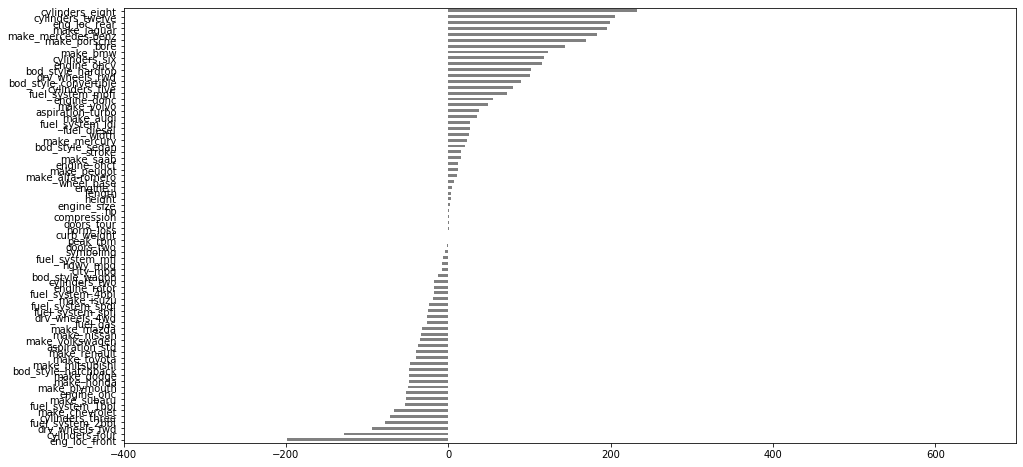

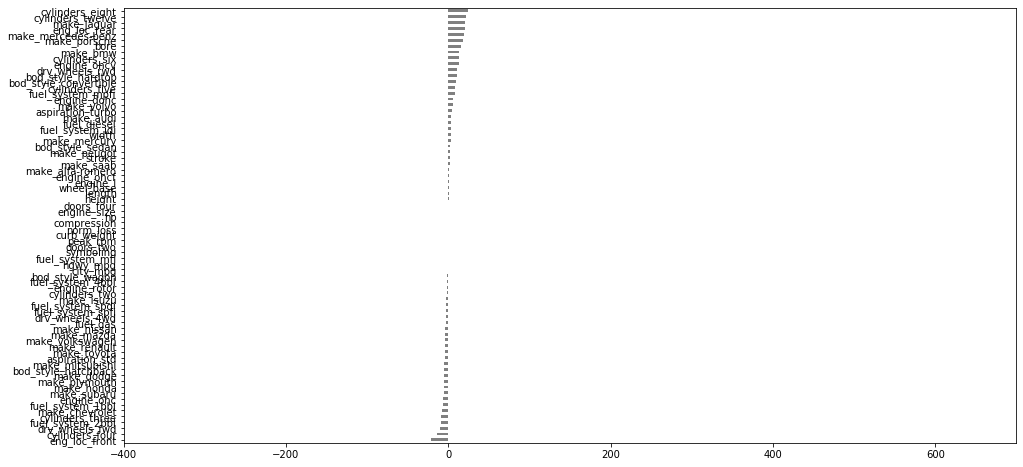

In [729]:

for alpha in [0.001, 0.01, 0.1, 1.0, 10, 100.0, 1000.0]:
    
    # Fit Ridge Regression model
    display(HTML(f'Ridge Regression, with alpha={alpha}'))
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(X_train_encoded, y_train_filled)
    y_pred = model.predict(X_test_encoded)

    # Get Test MAE
    mae = mean_absolute_error(y_test_filled, y_pred)
    display(HTML(f'Test Mean Absolute Error: ${mae:,.0f}'))
    
    # Plot coefficients
    coefficients = pd.Series(model.coef_, X_train_encoded.columns)
    plt.figure(figsize=(16,8))
    coefficients.sort_values().plot.barh(color='grey')
    plt.xlim(-400,700)
    plt.show()

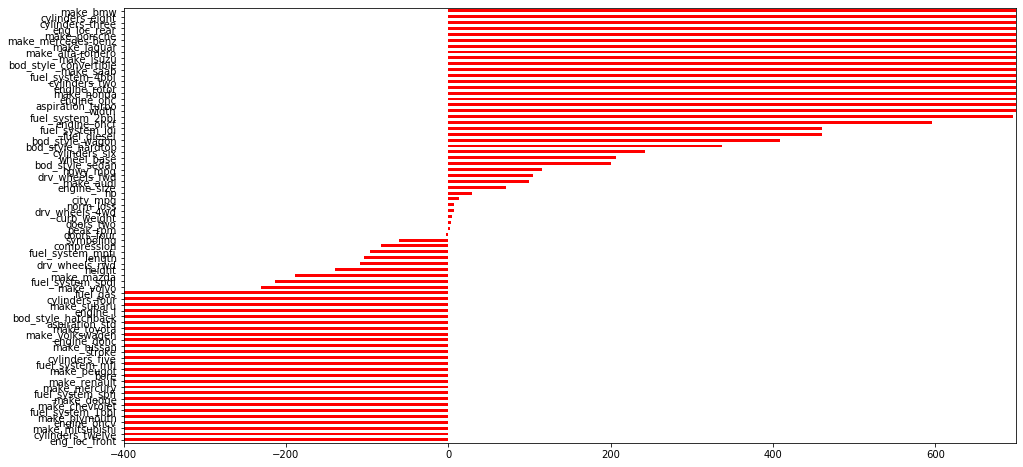

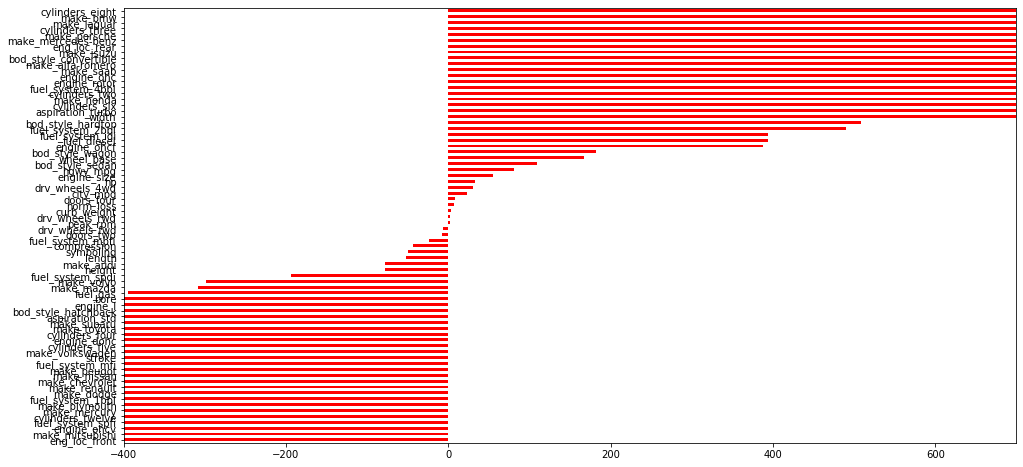

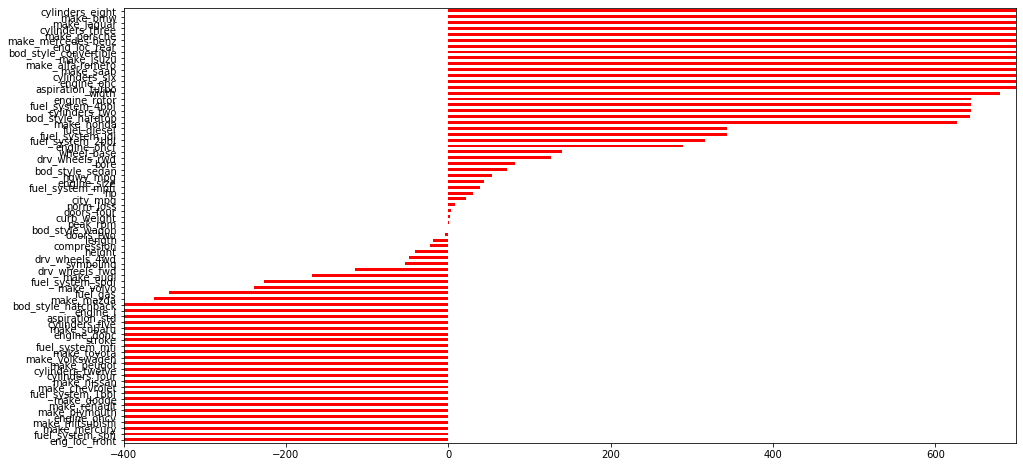

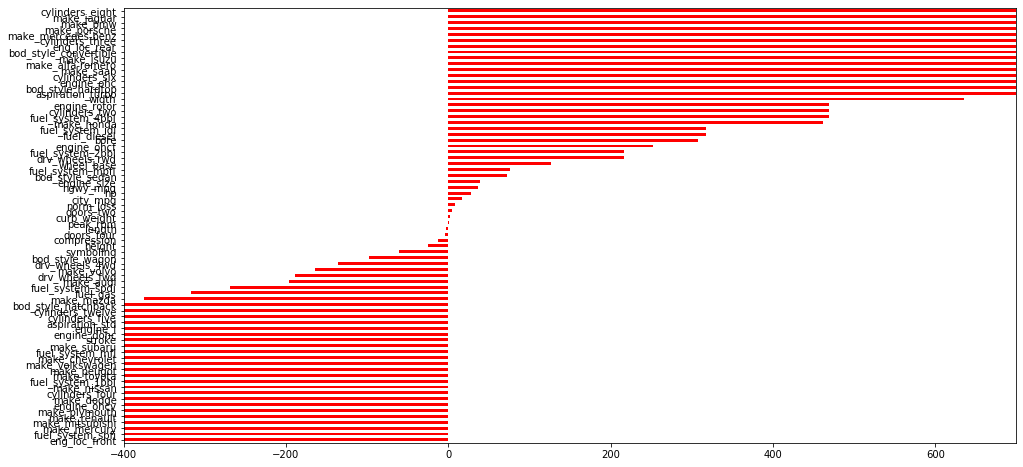

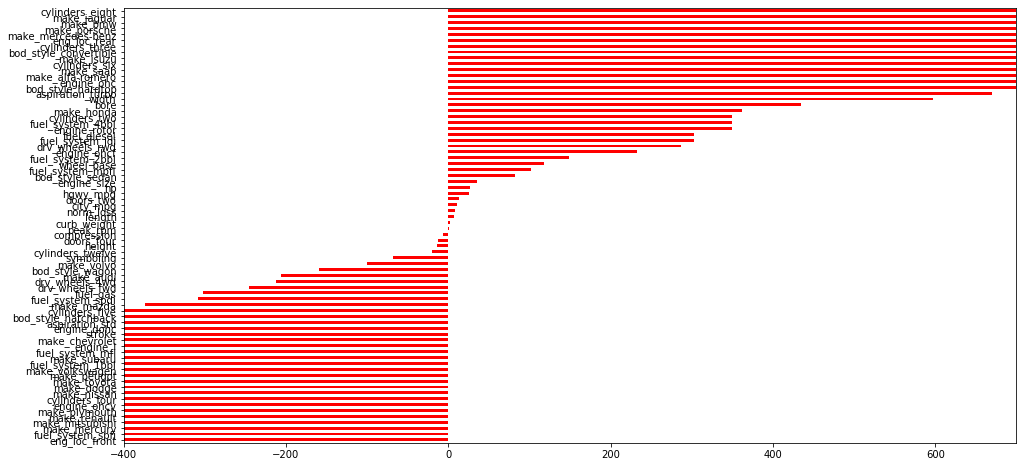

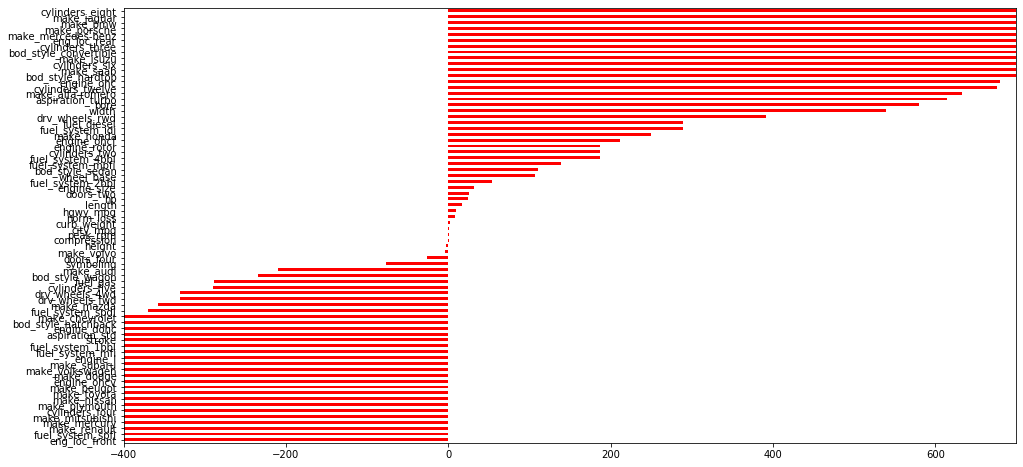

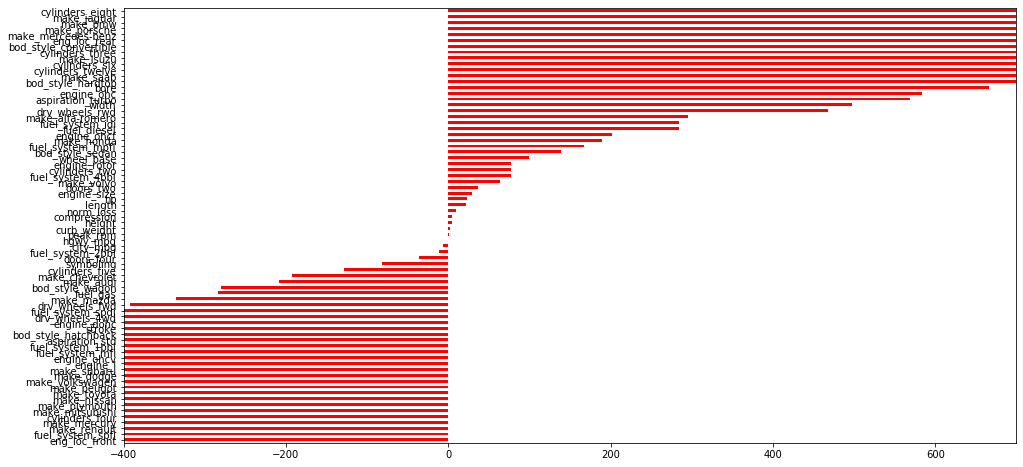

In [733]:

for alpha in [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]:
    
    # Fit Ridge Regression model
    display(HTML(f'Ridge Regression, with alpha={alpha}'))
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(X_train_encoded, y_train_filled)
    y_pred = model.predict(X_test_encoded)

    # Get Test MAE
    mae = mean_absolute_error(y_test_filled, y_pred)
    display(HTML(f'Test Mean Absolute Error: ${mae:,.0f}'))
    
    # Plot coefficients
    coefficients = pd.Series(model.coef_, X_train_encoded.columns)
    plt.figure(figsize=(16,8))
    coefficients.sort_values().plot.barh(color='red')
    plt.xlim(-400,700)
    plt.show()

In [736]:
for k in range(1, len(X_train_encoded.columns)+1):
    print(f'{k} features')
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train_encoded, y_train_filled)
    X_test_selected = selector.transform(X_test_encoded)
    model = Ridge(alpha=0.1, normalize=True)
    model.fit(X_train_selected, y_train_filled)
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test_filled, y_pred)
    print(f'Test Mean Absolute Error: ${mae:,.0f} \n')

1 features
Test Mean Absolute Error: $2,749 

2 features
Test Mean Absolute Error: $2,517 

3 features
Test Mean Absolute Error: $2,634 

4 features
Test Mean Absolute Error: $2,475 

5 features
Test Mean Absolute Error: $2,301 

6 features
Test Mean Absolute Error: $2,302 

7 features
Test Mean Absolute Error: $2,302 

8 features
Test Mean Absolute Error: $2,344 

9 features
Test Mean Absolute Error: $2,401 

10 features
Test Mean Absolute Error: $2,379 

11 features
Test Mean Absolute Error: $2,378 

12 features
Test Mean Absolute Error: $2,464 

13 features
Test Mean Absolute Error: $2,457 

14 features
Test Mean Absolute Error: $2,463 

15 features
Test Mean Absolute Error: $2,464 

16 features
Test Mean Absolute Error: $2,226 

17 features
Test Mean Absolute Error: $2,385 

18 features
Test Mean Absolute Error: $2,316 

19 features
Test Mean Absolute Error: $2,228 

20 features
Test Mean Absolute Error: $2,180 

21 features
Test Mean Absolute Error: $2,016 

22 features
Test Mean 

In [739]:
selector = SelectKBest(score_func=f_regression, k=20)

X_train_selected = selector.fit_transform(X_train_encoded, y_train_filled)


selected_mask = selector.get_support()
all_names = X_train_encoded.columns
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print("Features selected")
for name in selected_names:
  print(name)

print("\n")

print("Features not selected")
for name in unselected_names:
  print(name)

Features selected
norm_loss
make_mercedes-benz
make_jaguar
drv_wheels_rwd
drv_wheels_fwd
wheel_base
length
width
curb_weight
engine_ohcv
cylinders_four
cylinders_six
cylinders_eight
engine_size
fuel_system_2bbl
fuel_system_mpfi
bore
hp
city_mpg
hgwy_mpg


Features not selected
symboling
make_toyota
make_audi
make_saab
make_nissan
make_peugot
make_volvo
make_dodge
make_volkswagen
make_bmw
make_subaru
make_isuzu
make_mitsubishi
make_chevrolet
make_honda
make_renault
make_mazda
make_mercury
make_alfa-romero
make_porsche
make_plymouth
fuel_gas
fuel_diesel
aspiration_std
aspiration_turbo
doors_four
doors_two
bod_style_wagon
bod_style_hatchback
bod_style_sedan
bod_style_hardtop
bod_style_convertible
drv_wheels_4wd
eng_loc_front
eng_loc_rear
height
engine_ohc
engine_dohc
engine_l
engine_ohcf
engine_rotor
cylinders_five
cylinders_three
cylinders_two
cylinders_twelve
fuel_system_idi
fuel_system_spdi
fuel_system_1bbl
fuel_system_4bbl
fuel_system_mfi
fuel_system_spfi
stroke
compression
peak_rpm


In [740]:
model = Ridge(alpha=0.1, normalize=True)

model.fit(X_train_encoded, y_train_filled)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [743]:
y_pred = model.predict(X_test_encoded)

r2 = r2_score(y_test_filled, y_pred)
print(f'Test R^2 Score: {r2:.2f}')

Test R^2 Score: 0.46


How does the ridge regression score compare to your linear regression and baseline scores?

```

Baseline guessing: R2 = 0.0

Linear regression: R2 = 0.44

Ridge regression: R2 = 0.46

Results are comparable with Linear and Ridge regression for the same number of features. Slight boost in R2 with Ridge, but not a huge difference.


```

# Logistic Regression

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Logistic Regression:** `Your Answer Here`

**Majority Classifier:** `Your Answer Here`

**Validation Set:** `Your Answer Here`

**Accuracy:** `Your Answer Here`

**Feature Selection:** `Your Answer Here`

Answer each of the following questions with no more than a short paragraph.
<br/><br/>

What is the difference between linear regression and logistic regression?
```
Your Answer Here
```

What is the purpose of having a validation set?
```
Your Answer Here
```

Can we use MAE, MSE, RMSE, and $R^2$ to score a Logistic Regression model? Why or why not? If not, how do we score Logistic Regression models?
```
Your Answer Here
```

Use the Titanic dataset below to predict whether passengers survived or not. Try to avoid looking at the work you did during the lecture.

Make sure to do the following but feel free to do more:
- Train/Test/Validation Split
- Majority Classifier Baseline
- Include at least 2 features in X (Stretch, try K-Best)
- Use Logistic Regression
- Score your model's accuracy against the Majority Classifier Baseline
 - If you did not beat the baseline, tweak your model until it exceeds the baseline
- Score your model on the validation set

In [761]:
DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
train = pd.read_csv(DATA_PATH+'titanic/train.csv')
test = pd.read_csv(DATA_PATH+'titanic/test.csv')

In [762]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [763]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [745]:
from sklearn.model_selection import train_test_split

In [746]:
train, validate = train_test_split(train, random_state=8)

In [747]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [750]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            133
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          513
Embarked         2
dtype: int64

In [749]:
train["Sex"].value_counts(dropna=False)

male      430
female    238
Name: Sex, dtype: int64

In [751]:
train["Cabin"].value_counts(dropna=False)

NaN            513
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
C110             1
A36              1
E44              1
D46              1
C101             1
Name: Cabin, Length: 121, dtype: int64

In [752]:
train["Embarked"].value_counts(dropna=False)

S      481
C      127
Q       58
NaN      2
Name: Embarked, dtype: int64

In [753]:
target = "Survived"

features = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [764]:
y_train = train[target]
y_validate = validate[target]


X_train = train[features]
X_validate = validate[features]


In [767]:
majority_class = y_train.mode()[0]

y_pred = [majority_class] * len(y_train)

accuracy_score(y_train, y_pred)

0.6161616161616161

In [768]:
X_train.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [772]:
X_train["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [774]:
X_train[X_train["Embarked"].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,female,38.0,0,0,80.0,NaN
829,830,1,female,62.0,0,0,80.0,NaN


In [777]:
X_train.groupby("Sex")["Embarked"].value_counts(dropna=False)

Sex     Embarked
female  S           203
        C            73
        Q            36
        NaN           2
male    S           441
        C            95
        Q            41
Name: Embarked, dtype: int64

In [778]:
encoder = OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()
model = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=8)

In [779]:
X_train_encoded = encoder.fit_transform(X_train)
X_validate_encoded = encoder.transform(X_validate)

X_train_imputed = imputer.fit_transform(X_train_encoded)
X_validate_imputed = imputer.transform(X_validate_encoded)

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_validate_scaled = scaler.transform(X_validate_imputed)

model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=8,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [780]:
y_pred = model.predict(X_validate_scaled)
accuracy_score(y_validate, y_pred)

0.7937219730941704

In [782]:
0.6161616161616161 < 0.7937219730941704


True

#### The logistic regression model surpasses the baseline model $R^2$ score (Logistic: 0.794, Majority: 0.616)